In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np # Import numpy for handling potential NaN values
import openpyxl
from datetime import datetime 

### Setup

In [3]:
excel_file_path = 'data/excel_fooddesert/full_literature_list_2024-10-21(analyzing).xlsx'

In [109]:
output_dir = 'figures' # Output directory will be ../fooddesert_review-1/figures/
os.makedirs(output_dir, exist_ok=True)


In [5]:
df_lit = pd.read_excel(excel_file_path)
df_lit.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Research site,Country,Continent
0,J,"Wu, Q; Saitone, TL; Sexton, RJ",NaN,NaN,NaN,"Wu, Qi; Saitone, Tina L.; Sexton, Richard J.",NaN,NaN,"Food Access, Food Deserts, and the Women, Infa...",JOURNAL OF AGRICULTURAL AND RESOURCE ECONOMICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,USA,North America
1,J,"Leschewski, AM; Weatherspoon, DD",NaN,NaN,NaN,"Leschewski, Andrea Marie; Weatherspoon, Dave D.",NaN,NaN,Fast Food Restaurant Pricing Strategies in Mic...,INTERNATIONAL FOOD AND AGRIBUSINESS MANAGEMENT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michigan,USA,North America
2,J,"Wood, V; Thomas, M",NaN,NaN,NaN,"Wood, Van; Thomas, Manoj",NaN,NaN,Vulnerable populations in food deserts: a case...,INTERNATIONAL JOURNAL OF PHARMACEUTICAL AND HE...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Richmond,USA,North America
3,J,"Fitzpatrick, K; Greenhalgh-Stanley, N; Ploeg, MV",NaN,NaN,NaN,"Fitzpatrick, Katie; Greenhalgh-Stanley, Nadia;...",NaN,NaN,The Impact of Food Deserts on Food Insufficien...,AMERICAN JOURNAL OF AGRICULTURAL ECONOMICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,USA,North America
4,J,"Campbell, C; Pinedo, MMC; Midgette, W; Vieira, J",NaN,NaN,NaN,"Campbell, Colin; Calderon Pinedo, Monica Maria...",NaN,NaN,The Consequences of Living in a Small-town Foo...,SOCIAL CURRENTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,USA,North America


In [6]:
unnamed_cols_mask = df_lit.columns.str.contains('Unnamed:')
df_lit = df_lit.loc[:, ~unnamed_cols_mask]

In [7]:
geo_cols = ['Research site', 'Country', 'Continent']
time_col = 'Publication Year'

In [8]:
for col in geo_cols:
    df_lit[col] = df_lit[col].fillna('Unknown')
    # Optional: Convert to string type to avoid issues
    df_lit[col] = df_lit[col].astype(str)

In [9]:
print(df_lit.columns)


Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Conference Date',
       'Conference Location', 'Conference Sponsor', 'Conference Host',
       'Author Keywords', 'Keywords Plus', 'Abstract', 'Addresses',
       'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Part Number', 'Supplement',
       'Spe

In [10]:
df_lit[time_col] = pd.to_numeric(df_lit[time_col], errors='coerce')
df_lit.dropna(subset=[time_col], inplace=True)

df_lit[time_col] = df_lit[time_col].astype(int) # Convert to integer year

# Geographic Distribution Map

In [11]:
country_counts = df_lit[df_lit['Country'] != 'Unknown']['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Study Count']

In [23]:
!pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [12]:
import geodatasets

In [26]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [29]:
world_path = geodatasets.get_path('naturalearth_land')
world = gpd.read_file(world_path)

In [30]:
world

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


In [16]:
print("\nWorld map country names sample:", world['name'].unique()[:20]) # Show sample map names
print("Your data country names sample:", country_counts['Country'].unique()[:20]) # Show sample data names

KeyError: 'name'

In [14]:
world = world.rename(columns={'name': 'CountryName_Geo'})

In [15]:
world_merged = world.merge(country_counts, left_on='CountryName_Geo', right_on='Country', how='left')

KeyError: 'CountryName_Geo'

In [ ]:
world_merged['Study Count'] = world_merged['Study Count'].fillna(0)


In [ ]:
# Plotting the choropleth map
fig_map, ax_map = plt.subplots(1, 1, figsize=(15, 10))
world_merged.plot(column='Study Count',
                  ax=ax_map,
                  legend=True,
                  cmap='viridis', # Choose a colormap (e.g., 'viridis', 'plasma', 'Blues')
                  legend_kwds={'label': "Number of Studies",
                               'orientation': "horizontal"},
                  missing_kwds={"color": "lightgrey"} # Color for countries not in data/merged
                  )
ax_map.set_title('Geographic Distribution of Food Desert Studies by Country')
ax_map.set_axis_off() # Hide axis
plt.tight_layout()


In [ ]:
# Save the figure
map_filename = os.path.join(output_dir, 'figure1_geographic_distribution_map.png')
plt.savefig(map_filename, dpi=300)
print(f"Figure 1 saved as {map_filename}")

# Continent/Country

In [68]:
continent_values = df_lit['Continent'].fillna('Unknown') # Handle potential NaNs if any
initial_continent_counts = continent_values[continent_values != 'Uncertain'].value_counts()
print(continent_values.value_counts)


<bound method IndexOpsMixin.value_counts of 0      North America
1      North America
2      North America
3      North America
4      North America
           ...      
842    North America
843    North America
844    North America
845    North America
846    North America
Name: Continent, Length: 847, dtype: object>


In [69]:
multi_continent_labels = [
    'International',
    'North America, Europe',
    'Africa, North America',
    'USA, Europe', # Treating this as multi-continent
    'North America, Asia, Europe',
    'Europe, Africa',
    'Oceania, Asia'
]
label_to_remove = 'America' # Ambiguous label to remove

In [70]:
valid_multi_labels = [label for label in multi_continent_labels if label in initial_continent_counts.index]
multi_continent_sum = initial_continent_counts.loc[valid_multi_labels].sum()

In [71]:
final_continent_counts = initial_continent_counts.copy()
final_continent_counts = final_continent_counts.drop(labels=valid_multi_labels, errors='ignore')
final_continent_counts = final_continent_counts.drop(labels=[label_to_remove], errors='ignore')

if multi_continent_sum > 0:
    final_continent_counts['*Multiple continents'] = multi_continent_sum

final_continent_counts = final_continent_counts.sort_values(ascending=False)
final_continent_counts

Continent
North America           665
Europe                   63
*Multiple continents     32
South America            29
Asia                     21
Africa                   10
Oceania                   8
Name: count, dtype: int64

In [32]:
# # --- Bar Chart by Continent ---
# continent_counts = df_lit[df_lit['Continent'] != 'Uncertain']['Continent'].value_counts()
# print("\nStudy counts per continent:")
# print(continent_counts)


Study counts per continent:
Continent
North America                  665
Europe                          63
South America                   29
International                   25
Asia                            21
Africa                          10
Oceania                          8
North America, Europe            2
Africa, North America            1
USA, Europe                      1
America                          1
North America, Asia, Europe      1
Europe, Africa                   1
Oceania, Asia                    1
Name: count, dtype: int64


C:\Users\jour\AppData\Local\Temp\ipykernel_45112\1806891285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_continent_counts.index, y=final_continent_counts.values, palette='viridis')


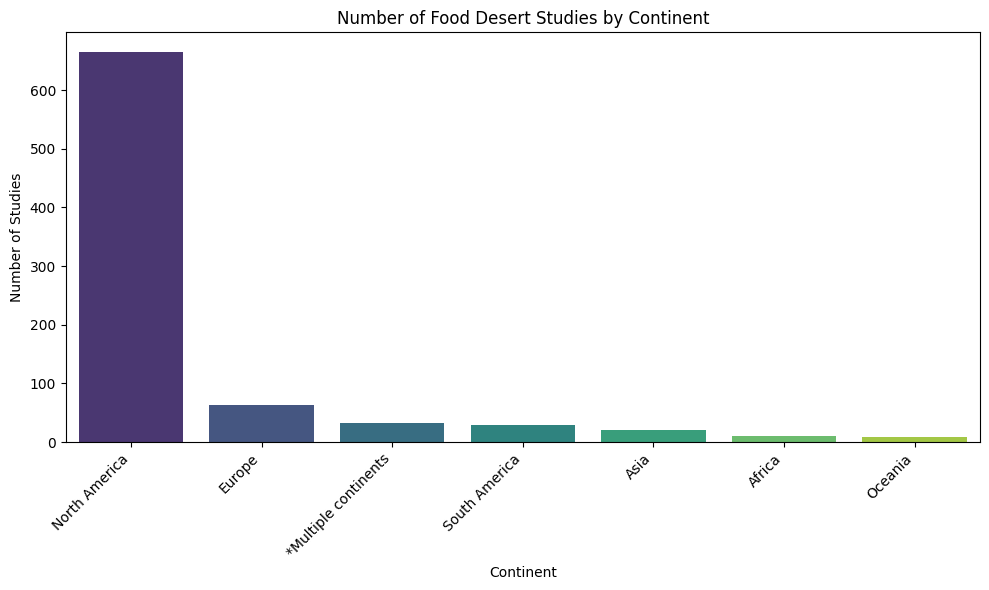

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=final_continent_counts.index, y=final_continent_counts.values, palette='viridis')
plt.title('Number of Food Desert Studies by Continent')
plt.ylabel('Number of Studies')
plt.xlabel('Continent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
# Save the figure
continent_bar_filename = os.path.join(output_dir, 'figure2a_studies_by_continent.png')
plt.savefig(continent_bar_filename, dpi=300)
print(f"Figure 2a (Continent Bar Chart) saved as {continent_bar_filename}")

In [73]:
### Country
country_values = df_lit['Country'].fillna('Unknown') # Handle potential NaNs if any

country_counts_series = country_values[country_values != 'Uncertain'].value_counts() 
country_counts_series

Country
USA                             626
Canada                           32
UK                               30
International                    25
Brazil                           21
Japan                             9
Slovakia                          8
Chile                             5
Austrailia                        5
South Korea                       4
Germany                           4
Mexico                            4
China                             3
Netherlands                       3
France                            3
South Africa                      3
USA, Canada                       3
Belgium                           2
Spain                             2
Sweden                            2
Colombia                          2
Kenya                             2
USA, Mexico                       1
Kenya, Mexico                     1
Iran                              1
Namibia                           1
Paraguay                          1
Australia           

In [63]:
multi_country_labels = [
    'International',
    'USA, Canada',
    'USA, Mexico',
    'Kenya, Mexico', 
    'USA, Canada, Mexico, Denmark',
    'United States, China, Sweden',
    'Belgium, Uganda', 
    'Austrailia, China', 
    'Sweden, Italy, France', 
    'Senegal, Mali'
]

In [74]:
valid_multi_labels = [label for label in multi_country_labels if label in country_counts_series.index]
multi_country_sum = country_counts_series.loc[valid_multi_labels].sum()


In [75]:
final_country_counts = country_counts_series.drop(labels=valid_multi_labels, errors='ignore')
final_country_counts = final_country_counts.drop(labels=['Uncertain'], errors='ignore')

if multi_country_sum > 0:
    final_country_counts['*Multiple countries'] = multi_country_sum

final_country_counts = final_country_counts.sort_values(ascending=False)
final_country_counts

Country
USA                    626
*Multiple countries     36
Canada                  32
UK                      30
Brazil                  21
Japan                    9
Slovakia                 8
Chile                    5
Austrailia               5
South Korea              4
Germany                  4
Mexico                   4
Netherlands              3
China                    3
South Africa             3
France                   3
Spain                    2
Belgium                  2
Colombia                 2
Kenya                    2
Sweden                   2
Iran                     1
Paraguay                 1
Australia                1
India                    1
Namibia                  1
Poland                   1
New Zealand              1
Lithuania                1
Italy                    1
Cyprus                   1
Solomon Islands          1
Croatia                  1
Mozambique               1
Hungary                  1
USA, Sweden              1
Serbia              

In [80]:
# --- Bar Chart by Top N Countries ---
top_n = 15 # Adjust N as needed
counts_to_plot = final_country_counts.head(top_n)


In [77]:
top_country_counts

Country
USA                    626
*Multiple countries     36
Canada                  32
UK                      30
Brazil                  21
Japan                    9
Slovakia                 8
Chile                    5
Austrailia               5
South Korea              4
Germany                  4
Mexico                   4
Netherlands              3
China                    3
South Africa             3
Name: count, dtype: int64

C:\Users\jour\AppData\Local\Temp\ipykernel_45112\4220034813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_to_plot.values, y=counts_to_plot.index, palette='viridis', orient='h')


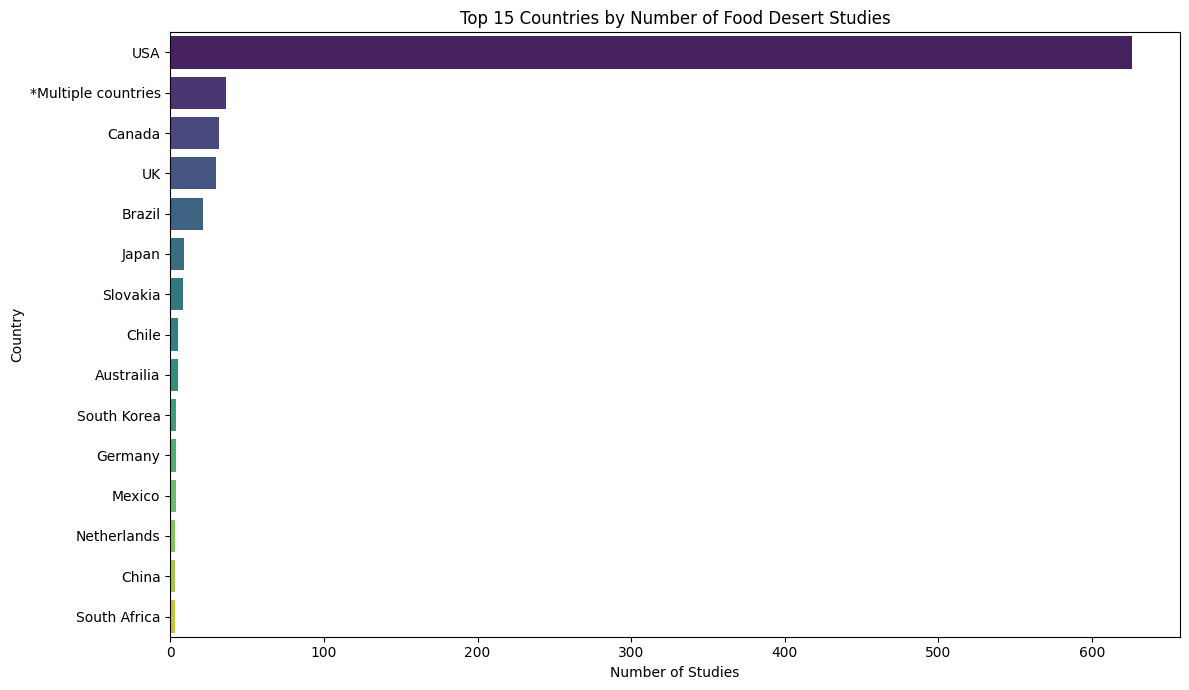

In [85]:
plt.figure(figsize=(12, 7))
sns.barplot(x=counts_to_plot.values, y=counts_to_plot.index, palette='viridis', orient='h')
plt.title(f'Top {top_n} Countries by Number of Food Desert Studies')
plt.xlabel('Number of Studies')
plt.ylabel('Country')
plt.tight_layout()

plt.show()

C:\Users\jour\AppData\Local\Temp\ipykernel_45112\138899479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_to_plot.values, y=counts_to_plot.index, palette='viridis', orient='h', ax=ax)


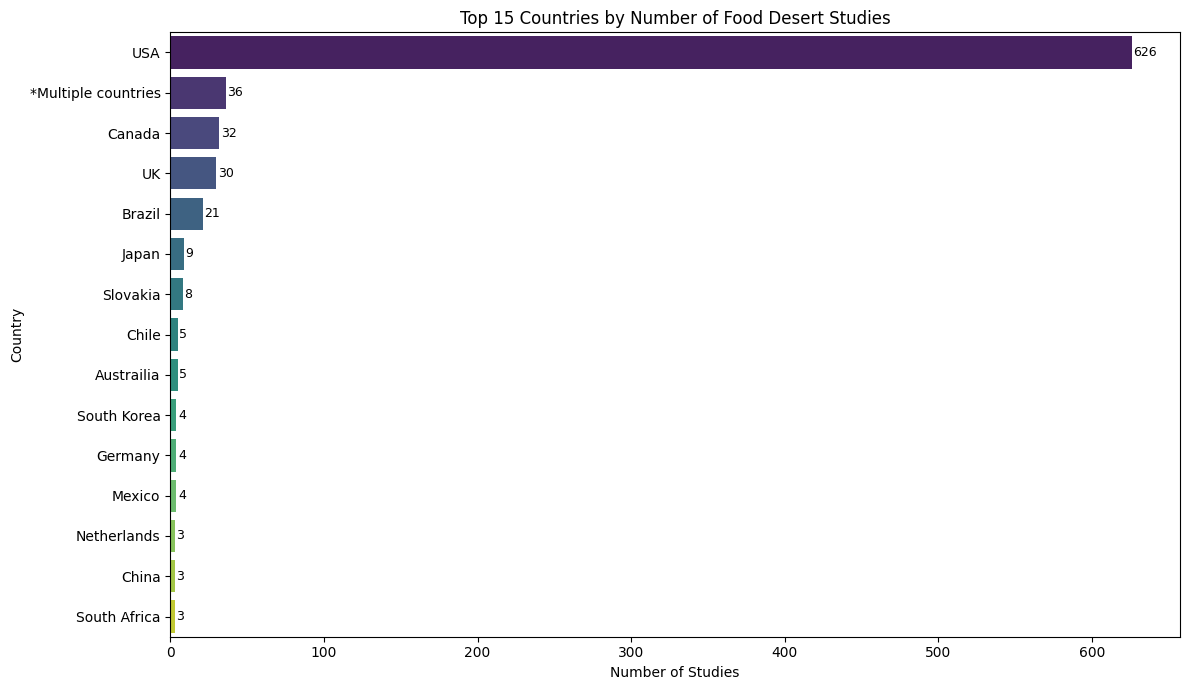

In [88]:
fig, ax = plt.subplots(figsize=(12, 7))

# Create the barplot, assigning the Axes object to 'ax'
# Note: We pass 'ax=ax' to sns.barplot
sns.barplot(x=counts_to_plot.values, y=counts_to_plot.index, palette='viridis', orient='h', ax=ax)

# --- Add value labels to the bars ---
# Iterate through the containers (bars) on the axes
for container in ax.containers:
    # Iterate through individual bars in the container
    for bar in container:
        # Get the width of the bar (which is the x-value or count)
        width = bar.get_width()
        # Add text annotation
        ax.text(width + 1,  # x-position: bar width + small offset (adjust offset e.g., 1, 2, or width*0.01)
                bar.get_y() + bar.get_height() / 2, # y-position: middle of the bar vertically
                f'{int(width)}', # Text label: the width formatted as integer
                va='center',     # Vertical alignment: center
                ha='left',       # Horizontal alignment: left (so text starts after the offset)
                fontsize=9)      # Adjust font size as needed

# Set title and labels using the axes object
ax.set_title(f'Top {top_n} Countries by Number of Food Desert Studies')
ax.set_xlabel('Number of Studies')
ax.set_ylabel('Country')

plt.tight_layout() # Adjust layout to prevent labels overlapping


In [89]:
# Save the figure
country_bar_grouped_filename_with_labels = os.path.join(output_dir, 'figure2b_studies_by_country_grouped_with_labels.png')
plt.savefig(country_bar_grouped_filename_with_labels, dpi=300)
print(f"Figure 2b (Grouped Country Bar Chart with Labels) saved as {country_bar_grouped_filename_with_labels}")


Figure 2b (Grouped Country Bar Chart with Labels) saved as ../figures\figure2b_studies_by_country_grouped_with_labels.png


<Figure size 640x480 with 0 Axes>

Most Frequently Studied Research Sites

In [ ]:
site_counts = df_lit[df_lit['Research site'] != 'Unknown']['Research site'].value_counts().reset_index()
site_counts.columns = ['Research Site', 'Number of Studies']

In [ ]:
top_site_n = 15 # Adjust N as needed
top_sites_table = site_counts.head(top_site_n).copy()

In [ ]:
site_country_map = df_lit.groupby('Research site')['Country'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()
top_sites_table['Country'] = top_sites_table['Research Site'].map(site_country_map)
top_sites_table

In [ ]:
table1_filename = os.path.join(output_dir, 'table1_top_research_sites.csv')
top_sites_table.to_csv(table1_filename, index=False)
print(f"Table 1 data saved as {table1_filename}")

# Temporal Trend by Geographic Region

In [102]:
current_year = datetime.now().year

In [103]:
df_lit_time_filtered = df_lit[
    (~df_lit['Continent'].isin(['Unknown', 'Uncertain', label_to_remove])) &
    (df_lit['Publication Year'] > 1980) &
    (df_lit['Publication Year'] < current_year) 
].copy()

In [104]:
df_lit_time_filtered.shape

(827, 65)

In [105]:
def group_continent(continent):
    if continent in multi_continent_labels:
        return '*Multiple continents'
    else:
        return continent # Keep single continents as they are

In [106]:
df_lit_time_filtered['Continent_Grouped'] = df_lit_time_filtered['Continent'].apply(group_continent)

In [107]:
temporal_continent_grouped_counts = df_lit_time_filtered.groupby(['Publication Year', 'Continent_Grouped']).size().unstack(fill_value=0)


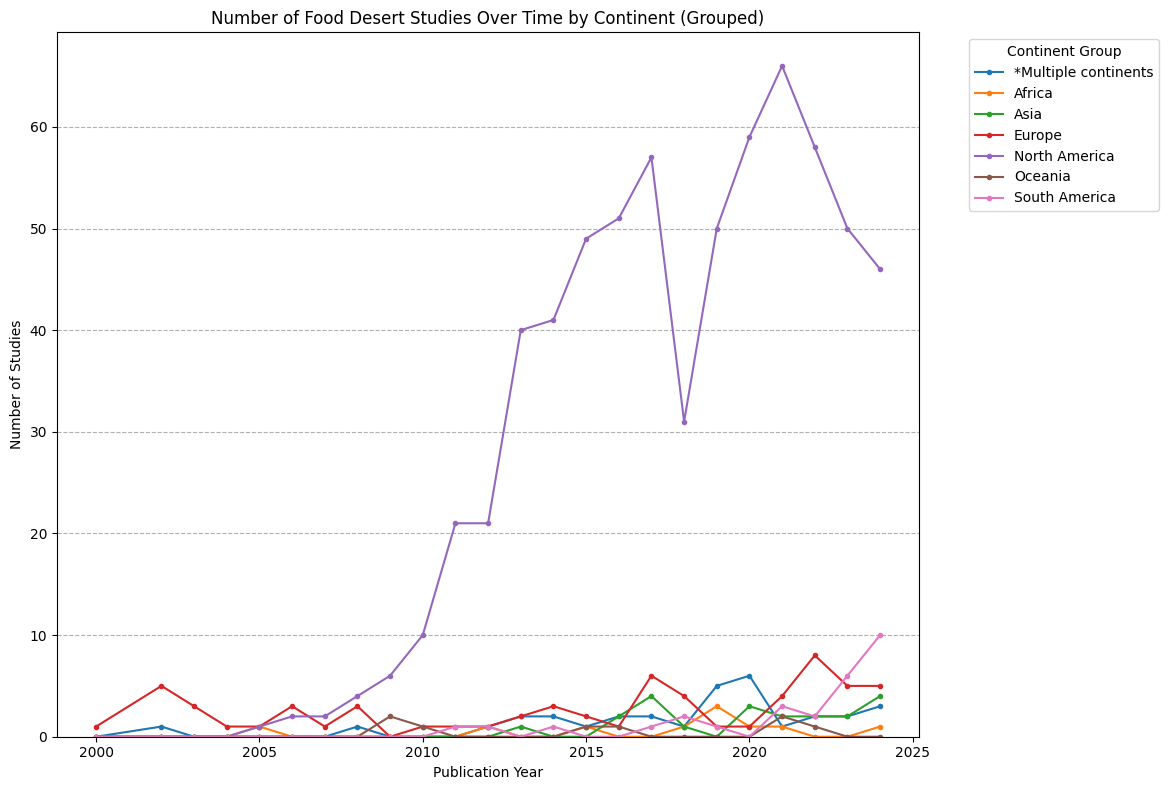

In [108]:
fig_time, ax_time = plt.subplots(figsize=(14, 8)) # Create figure and axes

# Plot the grouped data on the axes
temporal_continent_grouped_counts.plot(kind='line', marker='.', ax=ax_time) # Added markers for clarity

ax_time.set_title('Number of Food Desert Studies Over Time by Continent (Grouped)')
ax_time.set_xlabel('Publication Year')
ax_time.set_ylabel('Number of Studies')
ax_time.legend(title='Continent Group', bbox_to_anchor=(1.05, 1), loc='upper left')
ax_time.grid(True, axis='y', linestyle='--')

# Set y-axis to start from 0
ax_time.set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend


<function matplotlib.pyplot.show(close=None, block=None)>

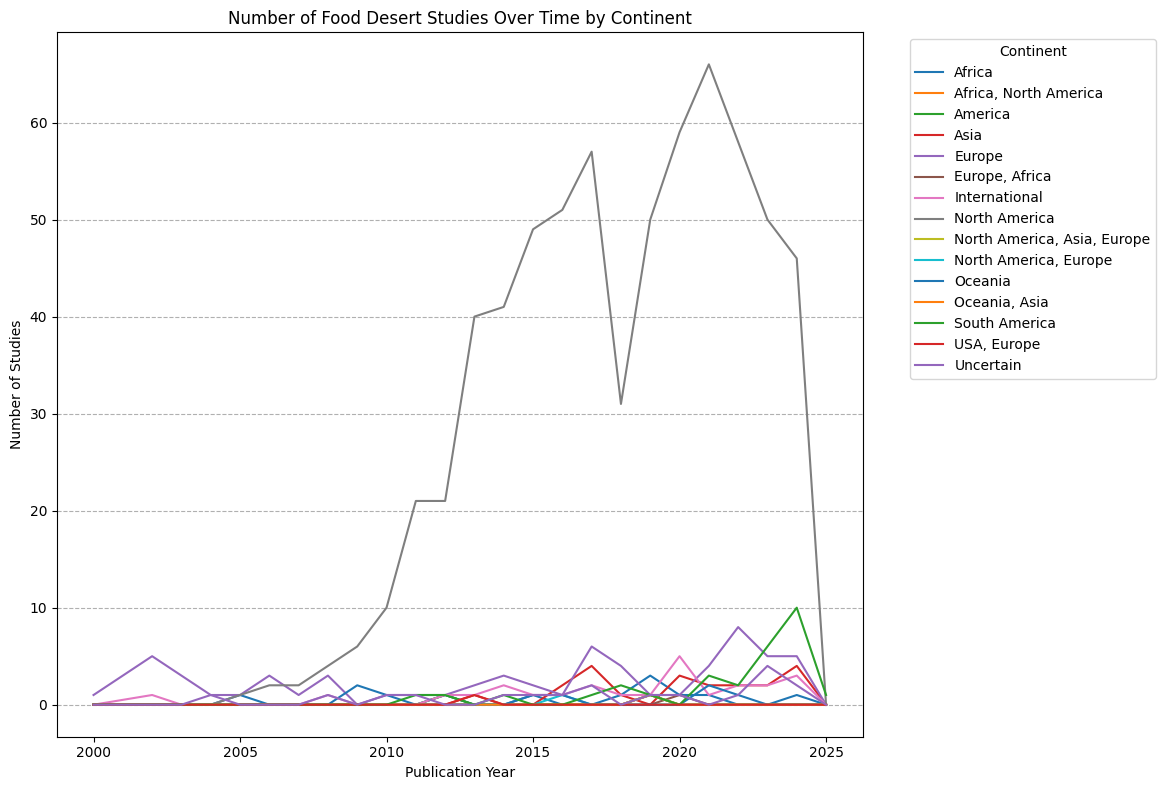

In [92]:
# plt.figure(figsize=(14, 8))
# temporal_continent_counts.plot(kind='line', ax=plt.gca()) # Use 'area' for stacked area chart
# plt.title('Number of Food Desert Studies Over Time by Continent')
# plt.xlabel('Publication Year')
# plt.ylabel('Number of Studies')
# plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, axis='y', linestyle='--')
# plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend

# plt.show

In [ ]:
temporal_filename = os.path.join(output_dir, 'figure3_temporal_trend_by_continent.png')
plt.savefig(temporal_filename, dpi=300)
print(f"Figure 3 saved as {temporal_filename}")